## Stock Price Prediction

In [234]:
#Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [235]:
# Importing dataset

start = '2009-01-01'
end = '2022-12-31'

data = yf.download('AAPL', start, end)
df = pd.DataFrame(data)
df.dropna()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,3.067143,3.251429,3.041429,3.241071,2.758535,746015200
2009-01-05,3.327500,3.435000,3.311071,3.377857,2.874956,1181608400
2009-01-06,3.426786,3.470357,3.299643,3.322143,2.827537,1289310400
2009-01-07,3.278929,3.303571,3.223571,3.250357,2.766438,753048800
2009-01-08,3.229643,3.326786,3.215714,3.310714,2.817811,673500800
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400


In [236]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,3.067143,3.251429,3.041429,3.241071,2.758535,746015200
2009-01-05,3.327500,3.435000,3.311071,3.377857,2.874956,1181608400
2009-01-06,3.426786,3.470357,3.299643,3.322143,2.827537,1289310400
2009-01-07,3.278929,3.303571,3.223571,3.250357,2.766438,753048800
2009-01-08,3.229643,3.326786,3.215714,3.310714,2.817811,673500800


### Data Information

In [237]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3.524000e+03
mean,48.003915,48.539805,47.474397,48.026177,46.181262,2.785958e+08
std,47.125520,47.727431,46.536616,47.153213,47.447345,2.360359e+08
min,2.835357,2.928571,2.792857,2.792857,2.377051,3.519590e+07
25%,16.245983,16.345536,16.049285,16.178571,13.967592,1.050942e+08
50%,28.263750,28.550000,27.980000,28.262501,25.910526,1.842352e+08
75%,54.116250,54.814999,53.332500,53.905626,51.934715,3.925831e+08
max,182.630005,182.940002,179.119995,182.009995,180.683868,1.880998e+09


In [238]:
# showing column wise %ge of NaN values they contains 

for i in df.columns:
  print(i,"\t-\t", df[i].isna().mean()*100)


Open 	-	 0.0
High 	-	 0.0
Low 	-	 0.0
Close 	-	 0.0
Adj Close 	-	 0.0
Volume 	-	 0.0


> Since there is no null valus, we can move further 

<Axes: >

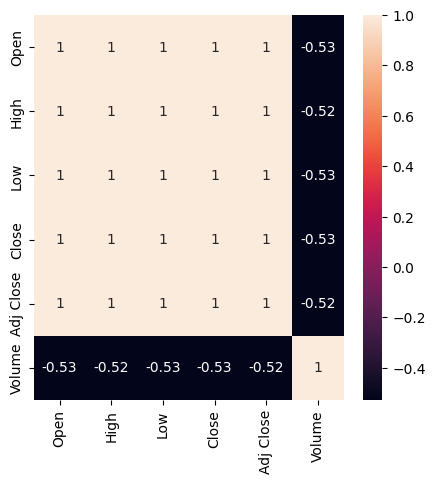

In [239]:
#df = df[df['symbol']=='AAP']   # Choosin stock values for any company 

cormap = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cormap, annot = True)

In [240]:
def get_corelated_col(cor_dat, threshold): 
  # Cor_data to be column along which corelation to be measured 
  #Threshold be the value above which of corelation to considered
  feature=[]
  value=[]

  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

  df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return df


In [241]:
top_corelated_values = get_corelated_col(cormap['Close'], 0.60)
top_corelated_values

,corr value
Open,0.999731
High,0.999873
Low,0.999878
Close,1.000000
Adj Close,0.999912


> Looks like all colums except _volume_ are ***highly co-related***. Using them for predictions.

In [242]:
df = df[top_corelated_values.index]
df.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2009-01-02,3.067143,3.251429,3.041429,3.241071,2.758535
2009-01-05,3.327500,3.435000,3.311071,3.377857,2.874956
2009-01-06,3.426786,3.470357,3.299643,3.322143,2.827537
2009-01-07,3.278929,3.303571,3.223571,3.250357,2.766438
2009-01-08,3.229643,3.326786,3.215714,3.310714,2.817811


In [243]:
df.shape

(3524, 5)

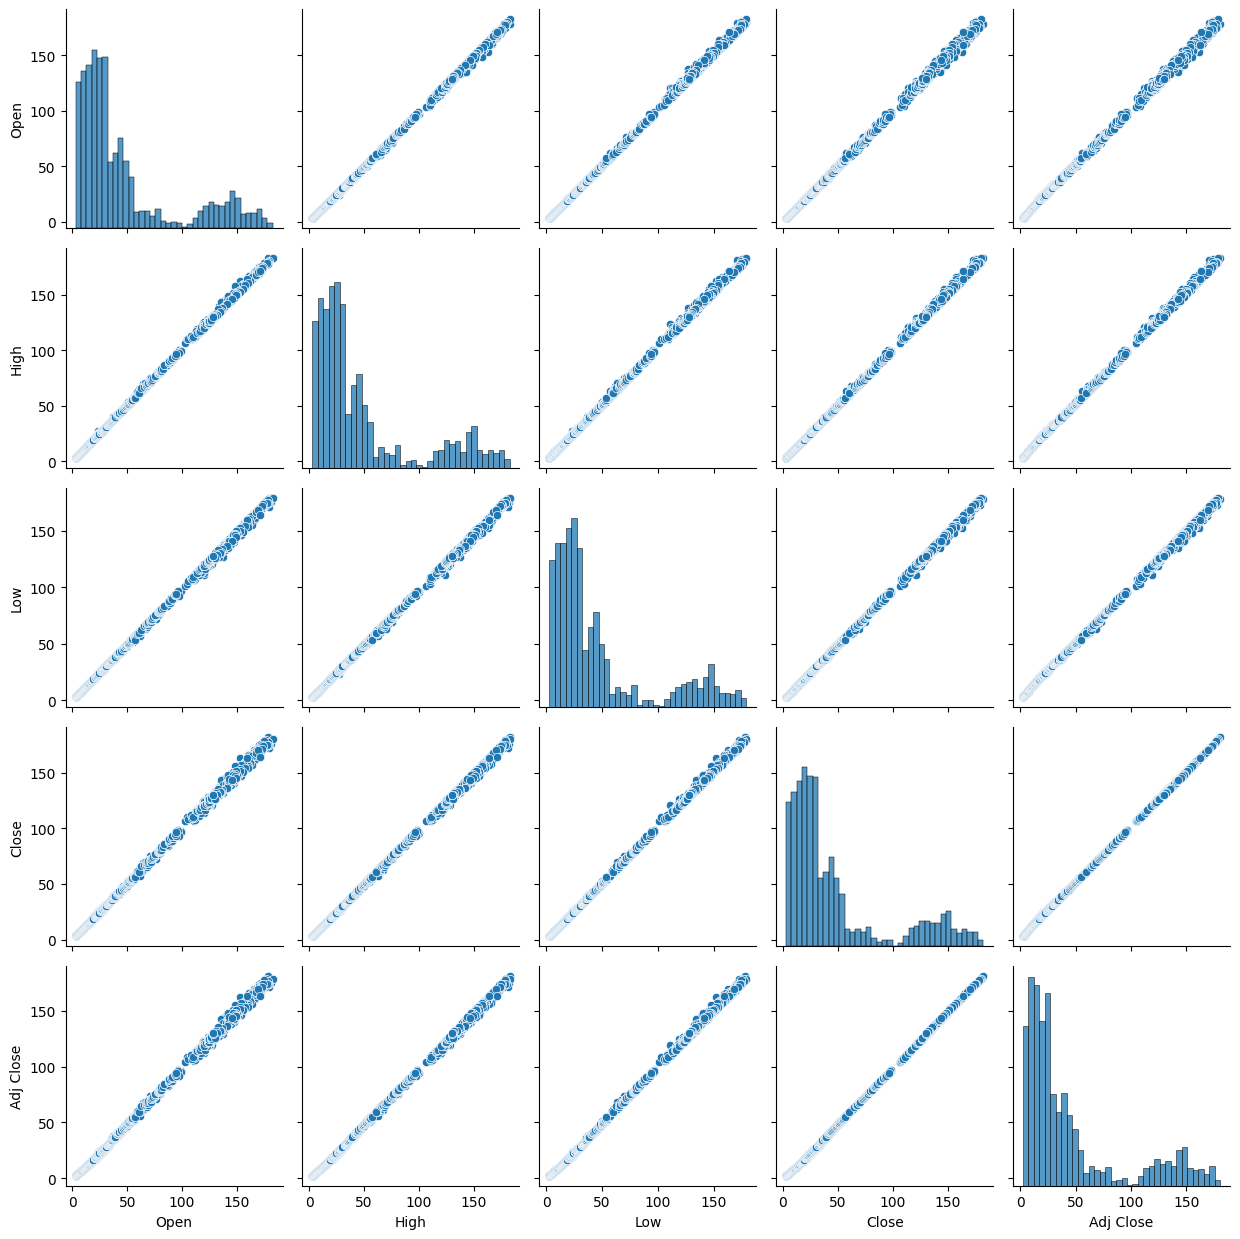

In [244]:
sns.pairplot(df)
plt.tight_layout()

> Since other parameters have linear relationship with __close__, we are using some linear models fore prediction

In [245]:
X = df.drop(['Close'], axis=1)
y = df['Close']

> Since range of data in different columns veries significantly we need to scale the independent variable i.e. X. For this we will use Min-Max Scaling.

In [246]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Open,High,Low,Adj Close
0,0.001289,0.001794,0.001410,0.002139
1,0.002737,0.002813,0.002939,0.002792
2,0.003289,0.003010,0.002874,0.002526
3,0.002467,0.002083,0.002443,0.002184
4,0.002193,0.002212,0.002398,0.002472


## Prediction Model

In [247]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,shuffle=False)

Acc = []


### 1. Linear Regression

In [248]:
from sklearn.linear_model import LinearRegression

# model training

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [249]:
# prediction
y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
Date,,
2017-05-26,38.402500,38.447586
2017-05-30,38.417500,38.573727
2017-05-31,38.189999,38.261947
2017-06-01,38.294998,38.181386
2017-06-02,38.862499,38.697984


In [250]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9997264303992408


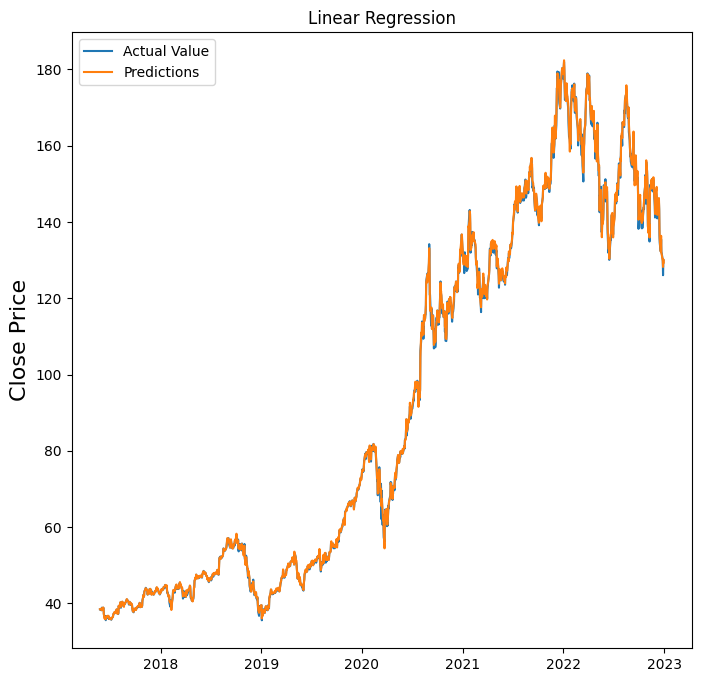

In [251]:
plt.figure(figsize=(8,8))
plt.title("Linear Regression")
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

### 3. CNN

In [252]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [253]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

def reg():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [254]:
# Model Training

model_3 = reg()
model_3.fit(X_train, y_train, epochs=100, validation_split=0.3)

Epoch 1/100
47/47 [==============================] - 2s 10ms/step - loss: 119.2475 - val_loss: 150.4400
Epoch 2/100
47/47 [==============================] - 0s 7ms/step - loss: 7.9187 - val_loss: 0.2499
Epoch 3/100
47/47 [==============================] - 0s 8ms/step - loss: 0.0873 - val_loss: 0.1348
Epoch 4/100
47/47 [==============================] - 0s 8ms/step - loss: 0.0236 - val_loss: 0.1776
Epoch 5/100
47/47 [==============================] - 0s 8ms/step - loss: 0.0181 - val_loss: 0.1512
Epoch 6/100
47/47 [==============================] - 0s 8ms/step - loss: 0.0147 - val_loss: 0.1592
Epoch 7/100
47/47 [==============================] - 0s 8ms/step - loss: 0.0143 - val_loss: 0.1819
Epoch 8/100
47/47 [==============================] - 0s 8ms/step - loss: 0.0151 - val_loss: 0.1634
Epoch 9/100
47/47 [==============================] - 1s 13ms/step - loss: 0.0141 - val_loss: 0.1665
Epoch 10/100
47/47 [==============================] - 1s 12ms/step - loss: 0.0145 - val_loss: 0.1659
Ep

In [255]:
# Prediction

y_pred_3 = model_3.predict(X_test)

45/45 [==============================] - 0s 2ms/step


In [256]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
Date,,
2017-05-26,38.402500,35.831989
2017-05-30,38.417500,35.830151
2017-05-31,38.189999,35.733662
2017-06-01,38.294998,35.671490
2017-06-02,38.862499,35.936508


In [257]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.827825330805038


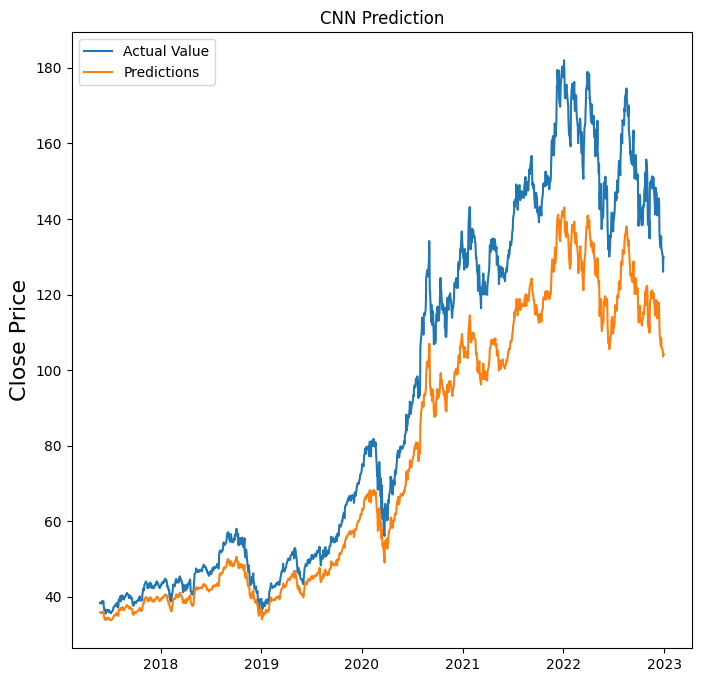

In [258]:
plt.figure(figsize=(8,8))
plt.title("CNN Prediction")
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

> Comparision of Accuracies of different models

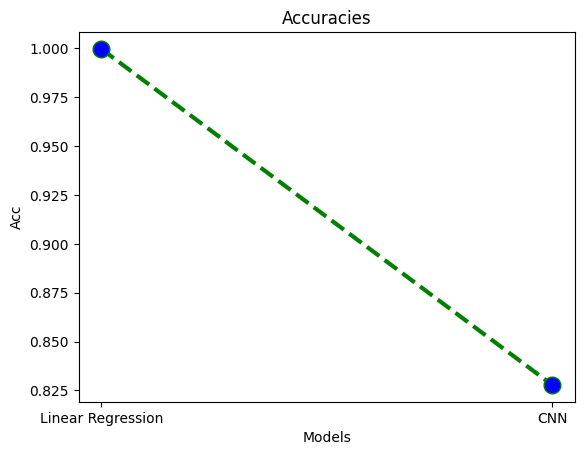

In [259]:
plt.plot(range(2), Acc, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(2), ['Linear Regression', 'CNN'])
plt.show()

**********************